# Brain Atlas Mapping

In [14]:
import os, sys, random
from sys import platform
_base_path = '\\'.join(os.getcwd().split('\\')[:-1]) + '\\' if platform == 'win32' else '/'.join(os.getcwd().split('/')[:-1]) + '/'
sys.path.append(_base_path)
import siibra
import nibabel as nib
from nilearn import plotting, datasets, image
import numpy as np
import matplotlib.pyplot as plt
from monai.utils import set_determinism
from src.helpers.utils import make_dataset
from src.modules.training import train_test_splitting
from src.helpers.config import get_config
from src.models.densenetmm import DenseNetMM
from src.modules.postprocessing import get_gradcam, get_affected_areas, write_json_prompt

In [2]:
_config = get_config()
saved_path = os.path.join(_base_path, _config.get('SAVED_FOLDER'))
reports_path = os.path.join(_base_path, _config.get('REPORT_FOLDER'))
json_path = os.path.join(_base_path, _config.get('JSON_FOLDER'))
if platform == 'win32':
	saved_path = saved_path.replace('/', '\\')
	reports_path = reports_path.replace('/', '\\')
	json_path = json_path.replace('/', '\\')

- Ensure reproducibility by setting a seed.

In [3]:
set_determinism(seed=3)
random.seed(3)

- Definition of experimental setting variables.

In [4]:
SIZE = 128
CHANNELS = ['T2w']
# FEATURES = ['sex', 'age', 'bmi', 'education', 'cdr_memory', 'cdr_orientation', 'cdr_judgment', 'cdr_community', 'cdr_hobbies', 'cdr_personalcare', 'boston_naming_test', 'depression', 'sleeping_disorder', 'motor_disturbance']
FEATURES = ['age', 'ethnicity', 'education', 'weight', 'height', 'brain_disease', 'heart_disease', 'depression', 'sleeping_disorder', 'motor_disturbance']
MULTICLASS = False

- Setting up the model.

In [5]:
_models = {
	'DenseNetMM': DenseNetMM(
		in_channels = len(CHANNELS),
		in_size = SIZE,
		in_features_size= len(FEATURES),
		out_channels = 3 if MULTICLASS else 2,
		append_features = True
	)
}
model = _models['DenseNetMM']

- Dataset download and splitting in **training**, **evalulation** and **testing** sets.

**NOTES**:

1. The download will start if data are not already present in `data` folder.

2. The splitting is carried out on subjects and not on sessions to avoid data leakage problem.

In [6]:
data_path, meta_path = make_dataset(dataset='oasis_aug', base_path=_base_path, verbose=False)
train_data, eval_data, test_data = train_test_splitting(
	data_folder=data_path,
	meta_folder=meta_path,
	channels=CHANNELS,
	features=FEATURES,
	multiclass=MULTICLASS,
	load_from_file=True,
	reports_path=reports_path
)

> > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > 

                    TRAINING            EVALUATION          TESTING             

> > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > 

subjects            527 (64.0 %)        132 (16.0 %)        165 (20.0 %)        

sessions            747 (64.84 %)       185 (16.06 %)       220 (19.1 %)        



- Definition of **atlases** and **parcellations**.

**NOTES**:

1. Atlases provide a common context for a collection of parcellations and reference spaces of the same species.

2. Parcellations define a hierarchy of brain regions, and provide access to available parcellations maps in different reference spaces. 

In [15]:
atlas = siibra.atlases['human']
parcellations = list(atlas.parcellations)

- Print of all available parcellations for the human atlas.

In [8]:
## NOTE: uncomment this to show all available parcellations (Atlas).

# print(''.join(['> ' for i in range(40)]))
# print(f'\n{"INDEX":<8}{"PARCELLATIONS NAME":<20}\n')
# print(''.join(['> ' for i in range(40)]))
# for i, p in enumerate(parcellations):
# 	print(f'{i:<8}{p.name:<20}')

This section involves the application of advanced image processing and analysis techniques to extract meaningful insights from our MRI data.

### Grad-CAM Visualization

**[PROPRIETARY METHOD]**

This cell implements a novel approach for visualizing the regions of interest in MRI scans using an advanced variant of the Grad-CAM algorithm. The specific implementation details are currently under review for publication and have been omitted from this public repository.

General workflow:
1. Apply modified Grad-CAM algorithm to MRI scan
2. Generate heatmap of regions of interest
3. Create segmentation mask by thresholding the heatmap

The method significantly improves the interpretability of the model's decision-making process compared to traditional approaches.

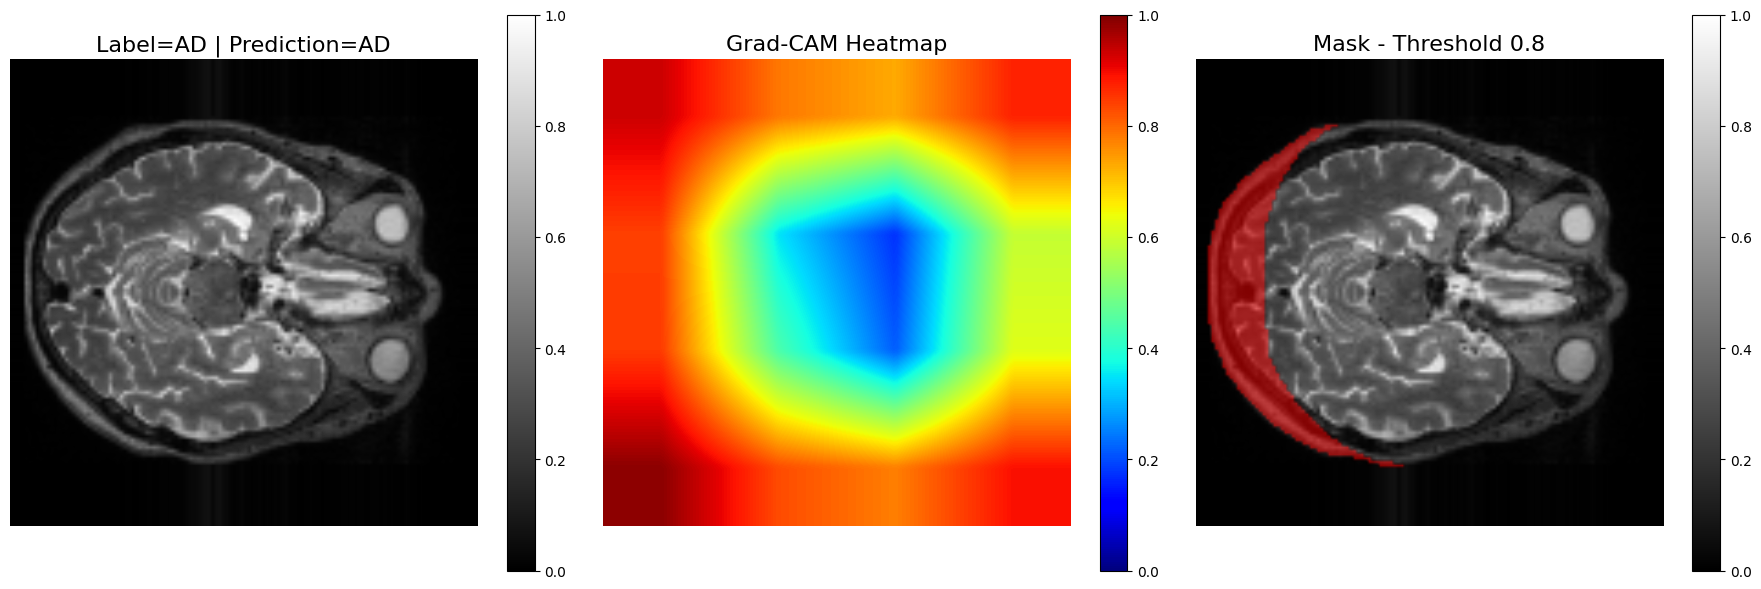

In [9]:
# The code has been omitted to protect unpublished research.

### MNI-152 Space Transformation and 3D Visualization

**[CONFIDENTIAL SECTION]**

This section contains proprietary methods for transforming our results into a standardized brain space (MNI-152) and visualizing them in 3D. The code has been omitted to protect the integrity of the ongoing research process.

Key points:
- Purpose: Transform segmentation mask to MNI-152 space and create 3D visualization
- Input: Segmentation mask from Grad-CAM output
- Output: 3D plot of spatial points in MNI-152 space

Key points:
- Parcellation used: Julich-Brain Cytoarchitectonic Atlas (v3.0.3)
- Output: Percentage of heatmap and region affected for most impacted areas

In [16]:
# The code has been omitted to protect unpublished research.

> > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > 

                                  REGION   %_of_HEATMAP    %_of_REGION

> > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > 
                Area hOc2 (V2, 18) right          22.72          10.74
         Area hOc1 (V1, 17, CalcS) right          22.20           6.48
      Temporal-to-Parietal (GapMap) left          20.31           1.31
        Area 6mp (SMA, mesial SFG) right           9.92          16.75
               Area hOc3d (Cuneus) right           7.57           7.40


### JSON File Generation

**[PROPRIETARY METHOD]**

This cell implements a novel approach for structuring and saving our analysis results in a JSON format. This JSON file will serve as input for our language model-based report generation system. The specific implementation details are currently under review for publication and have been omitted from this public repository.

General workflow:
1. Compile analysis results
2. Structure data in a specific format
3. Save as JSON file

In [12]:
# The code has been omitted to protect unpublished research.

### Visualization of Affected Brain Regions

**[CONFIDENTIAL SECTION]**

This section contains proprietary methods for visualizing the most affected brain regions on a general brain model. The code has been omitted to protect the integrity of the ongoing research process.

Key points:
- Purpose: Visualize affected brain regions on a standard brain model
- Input: Analysis results from previous steps
- Output: Visual representation of affected regions

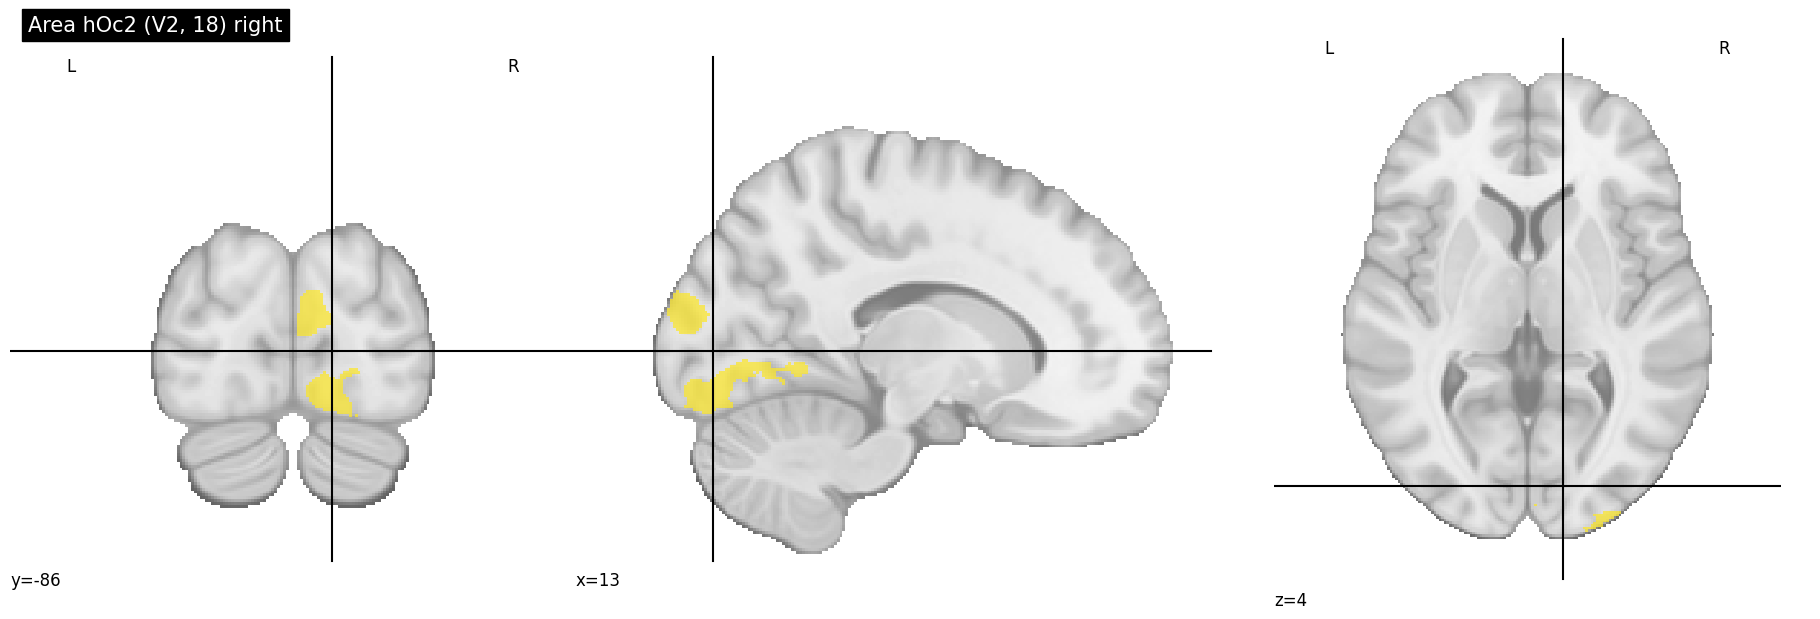

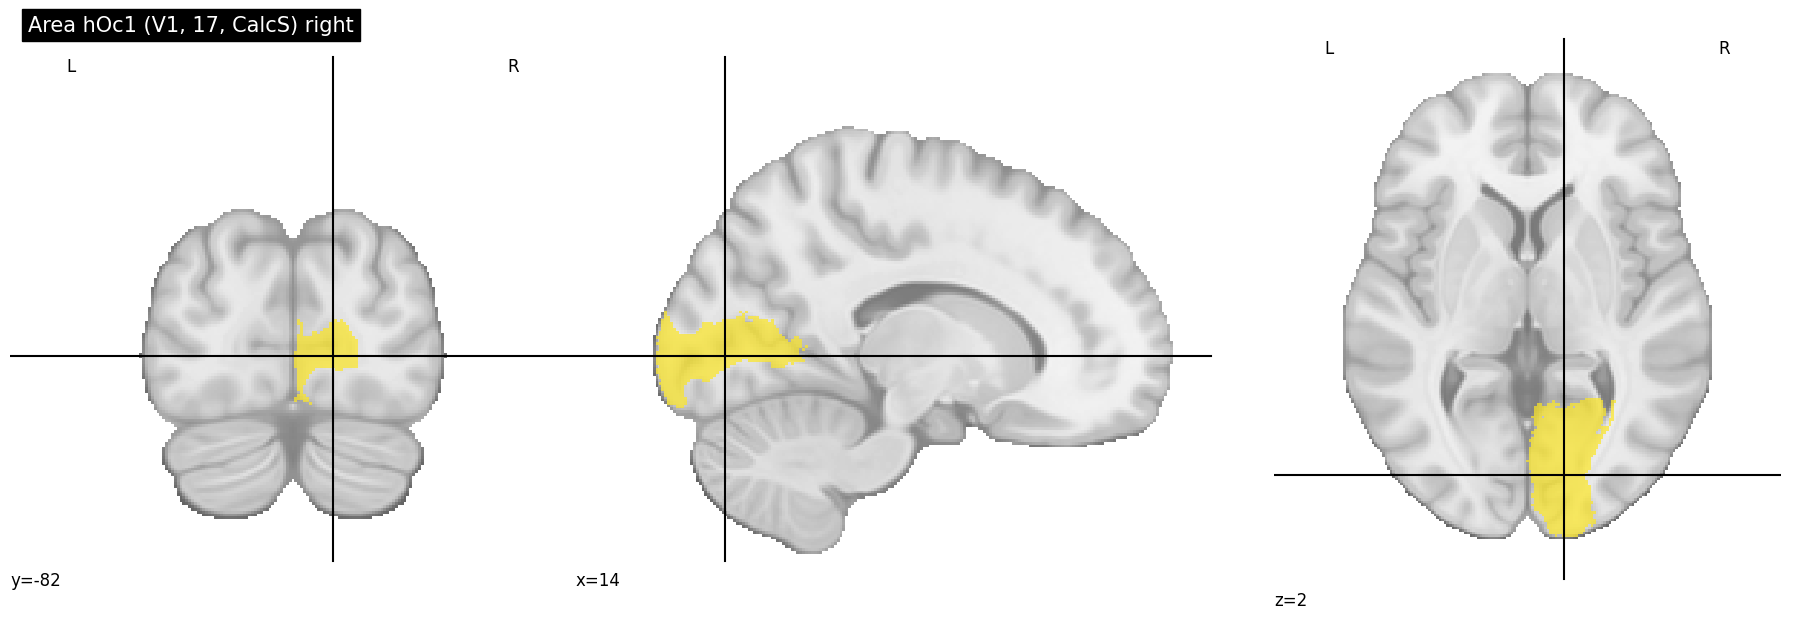

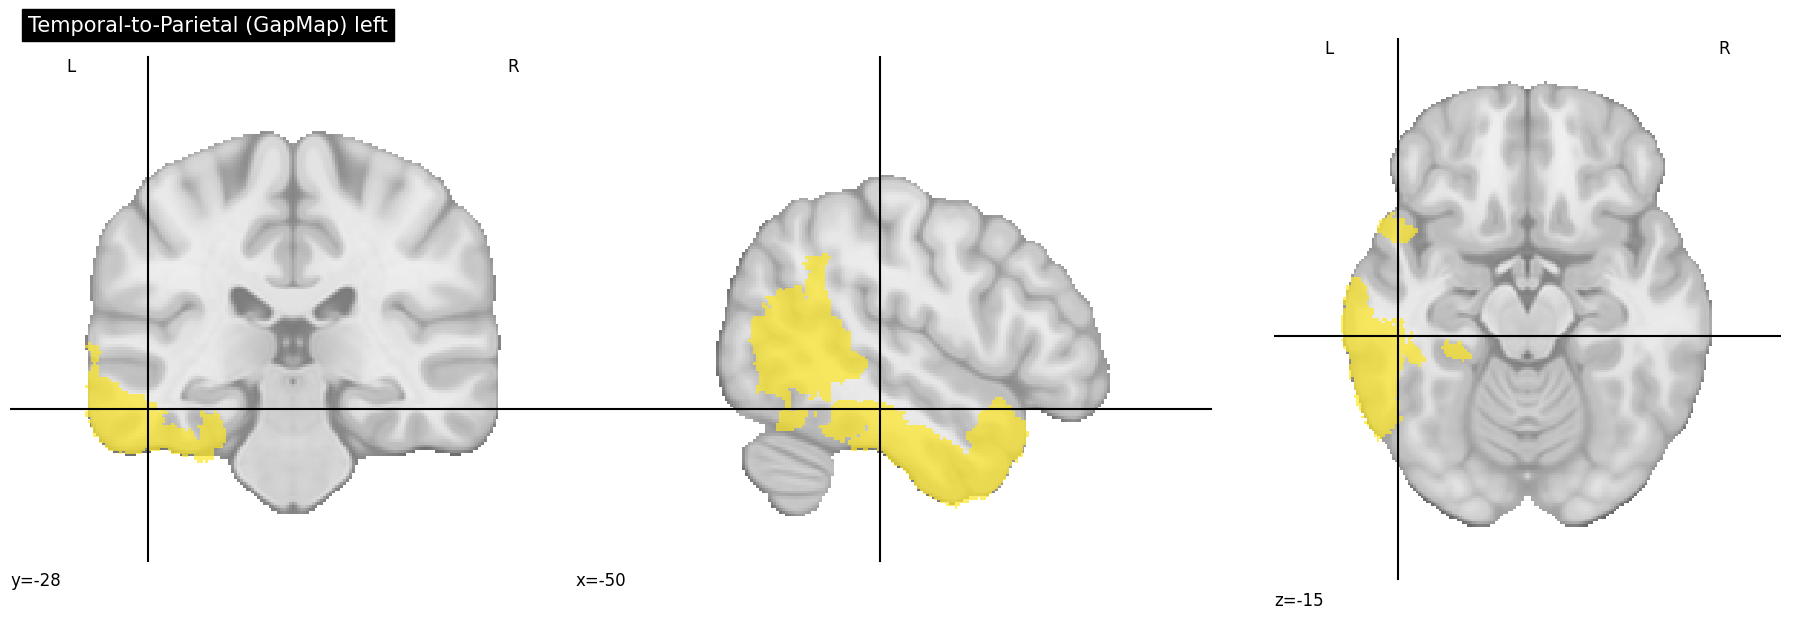

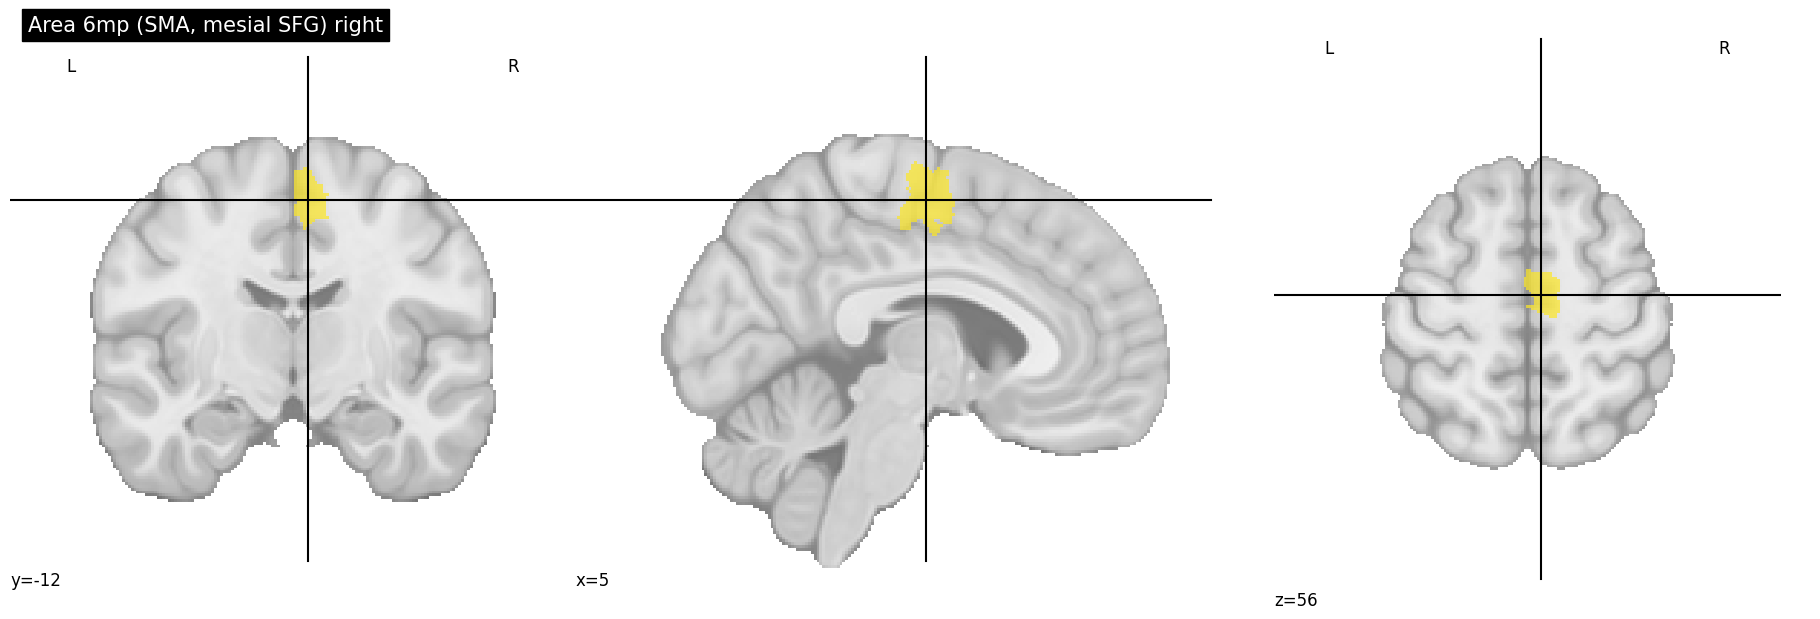

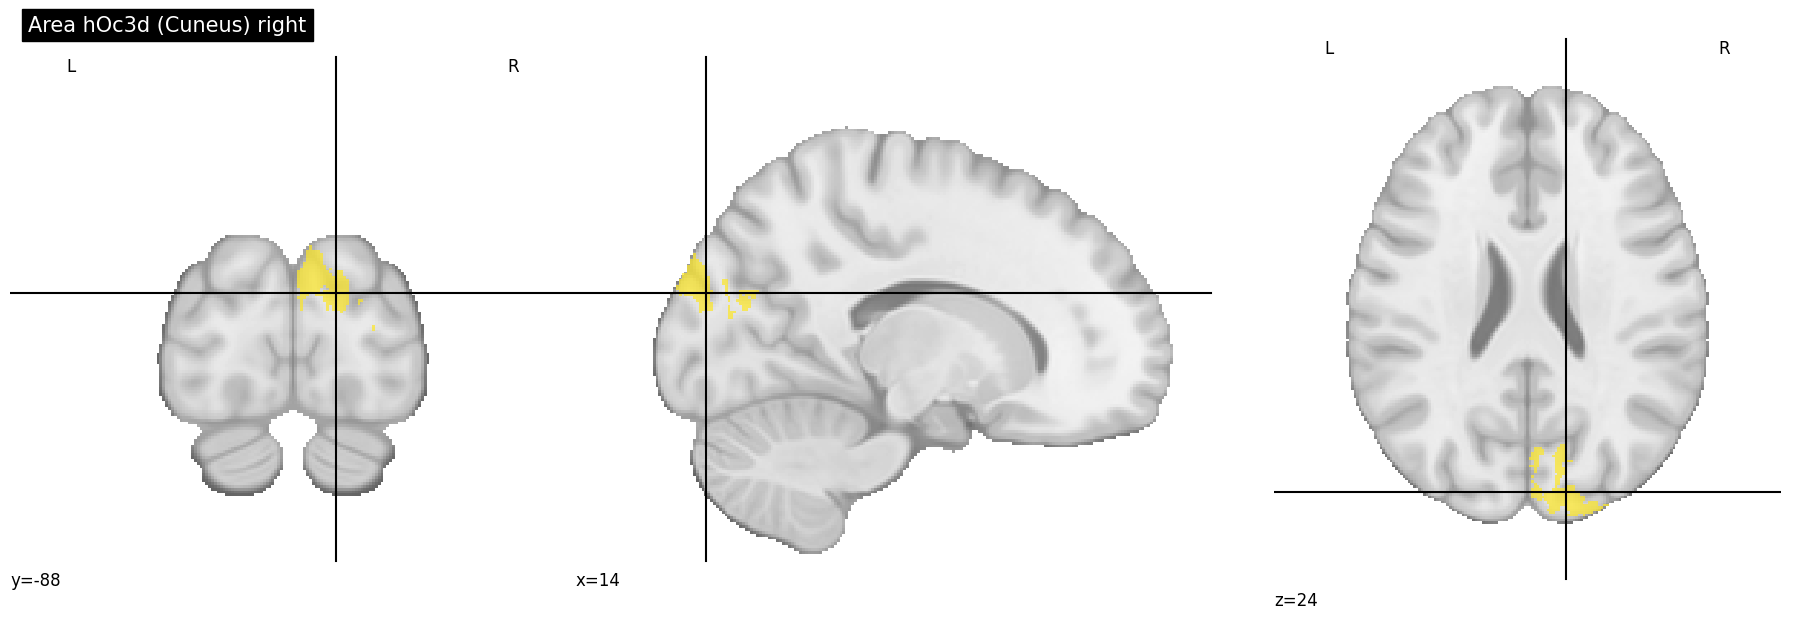

In [25]:
# The code has been omitted to protect unpublished research.